In [3]:
import os
import pickle
import math
import random
import csv
from PIL import Image

import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten

print('All modules imported.')

All modules imported.


In [4]:
import keras
from keras import optimizers, regularizers
from keras.datasets import mnist
from keras.applications import VGG16, VGG19, InceptionResNetV2, Xception, NASNetLarge
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.preprocessing import image
from keras.models import Model
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import cv2

import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
from IPython.display import display, Image

import numpy as np
import csv
import glob
import random
import math

print('Keras modules imported.')

Using TensorFlow backend.


Keras modules imported.


# 1 Reload the preprocessed data

In [5]:
# 1 Reload the preprocessed data

pickle_file = './pre-data.pickle'
with open(pickle_file, 'rb') as f:
    pickle_data = pickle.load(f)
    X_train = pickle_data['train_features']
    y_train = pickle_data['train_labels']
    X_valid = pickle_data['valid_features']
    y_valid = pickle_data['valid_labels']
    X_test = pickle_data['test_features']
    y_test = pickle_data['test_labels']
    signnames = pickle_data['signnames']
    del pickle_data  # Free up memory
    
# Shuffle the data set
X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)
X_test, y_test = shuffle(X_test, y_test)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)
print(len(signnames))
print('Data loaded.')

(34799, 32, 32, 3) (34799,)
(4410, 32, 32, 3) (4410,)
(12630, 32, 32, 3) (12630,)
43
Data loaded.


# 2 AlexNet Architecture

In [6]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K
K.set_image_data_format('channels_last')

def cnn_model():
    model = Sequential()

    model.add(Conv2D(9, (5, 5), strides=(1,1), padding='valid',
                     input_shape=(32,32,3), 
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))

    model.add(Conv2D(32, (3, 3), strides=(1,1), padding='valid',
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))

    model.add(Conv2D(48, (3, 3), strides=(1,1), padding='same',
                     activation='relu'))
    model.add(Conv2D(64, (3, 3), strides=(1,1), padding='same',
                     activation='relu'))
    model.add(Conv2D(96, (3, 3), strides=(1,1), padding='same',
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))

    model.add(Flatten())
    model.add(Dense(400, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(160, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(43, activation='softmax'))
    return model

# 3. Training the Model

In [7]:
model = cnn_model()

opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_valid, y_valid))

# Saving the model
model_json = model.to_json()
with open("model_a.json", "w") as json_file :
	json_file.write(model_json)

model.save_weights("model_a.h5")
print("Saved model to disk")

model.save('CNN_a.model')




Train on 34799 samples, validate on 4410 samples
Epoch 1/30
34799/34799 [==============================] - 33s 956us/step - loss: 4.5952 - accuracy: 0.2297 - val_loss: 2.3624 - val_accuracy: 0.4306
Epoch 2/30
34799/34799 [==============================] - 33s 947us/step - loss: 1.7941 - accuracy: 0.5504 - val_loss: 1.2786 - val_accuracy: 0.7075
Epoch 3/30
34799/34799 [==============================] - 33s 947us/step - loss: 1.0617 - accuracy: 0.7622 - val_loss: 0.8965 - val_accuracy: 0.8200
Epoch 4/30
34799/34799 [==============================] - 33s 945us/step - loss: 0.7364 - accuracy: 0.8620 - val_loss: 0.8206 - val_accuracy: 0.8376
Epoch 5/30
34799/34799 [==============================] - 33s 942us/step - loss: 0.5906 - accuracy: 0.9003 - val_loss: 0.6101 - val_accuracy: 0.8907
Epoch 6/30
34799/34799 [==============================] - 32s 918us/step - loss: 0.4993 - accuracy: 0.9222 - val_loss: 0.5531 - val_accuracy: 0.9082
Epoch 7/30
34799/34799 [==============================]

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


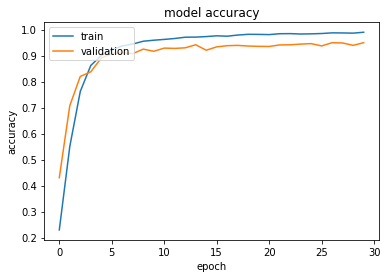

In [8]:
# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

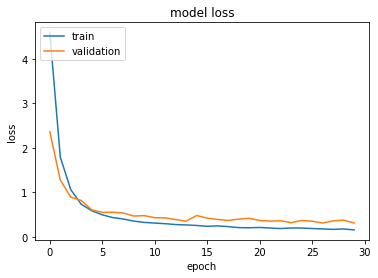

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# 4 Testing

## 4.1 Test the model on testing dataset

In [10]:
# load json and create model
json_file = open('./model_a.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("./model_a.h5")
opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

# predict and evaluate
y_pred = model.predict_classes(X_test)
acc = np.sum(y_pred == y_test) / np.size(y_pred)
print("Test accuracy = {}".format(acc))

Test accuracy = 0.9355502771179731


## 4.2 Test the Model on New Images
To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type. You may find signnames.csv useful as it contains mappings from the class id (integer) to the actual sign name.

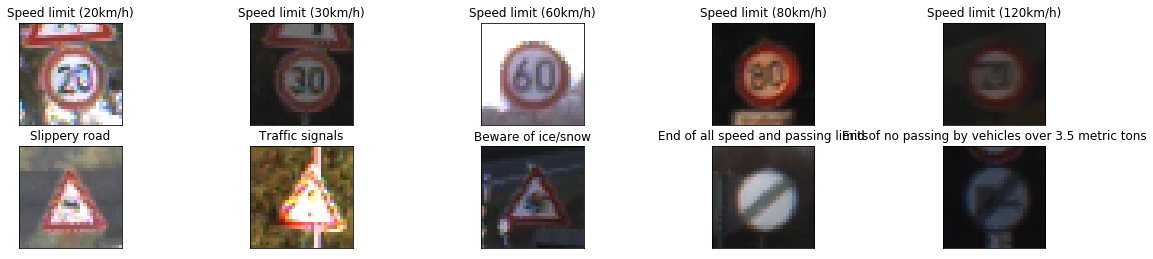

In [11]:
from PIL import Image

gt_images = []
gt_labels = []

with open('./test_images/labels.csv') as f:
    gt_labels = [row[7] for row in csv.reader(f)]
# print(gt_labels)

for i in range(1, 11):
    img = Image.open('./test_images/' + str(i) +'.ppm')
    img.save('./test_images/' + str(i) +'.jpg')
    gt_images.append(plt.imread('./test_images/' + str(i) +'.ppm'))
# print(gt_images)

plt.figure(figsize=(20, 20))
for i in range(len(gt_images)):
    plt.subplot(9, 5, i + 1), plt.imshow(gt_images[i]), plt.title(signnames[int(gt_labels[i])])
    plt.xticks([]), plt.yticks([])
    
gt_images = np.array(gt_images)
gt_labels = np.array(gt_labels)
    
# Normalization
gt_images = gt_images.astype(np.float32) / 128. - 1.

Predict the Sign Type for Each Image

In [12]:
y_pred_t = model.predict_classes(gt_images)

In [13]:
y_pred_t

array([ 0,  1,  3,  5,  8, 23, 26, 30, 32, 42], dtype=int64)

##  Accuracy for predicting unknown images from Web

In [14]:
gt_labels

array(['0', '1', '3', '5', '8', '23', '26', '30', '32', '42'], dtype='<U2')

In [15]:
cnt=0
for i in range(y_pred_t.size):
    if int(gt_labels[i]) == y_pred_t[i]:
        cnt = cnt+1

pred_acc = (cnt/y_pred_t.size)*100
print("Accuracy for Predicting unknown images from web:",pred_acc,"%")

Accuracy for Predicting unknown images from web: 100.0 %
